In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

# загружаем датасет
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
data = pd.read_csv(url, header=None)

# выделяем все параметры, начиная со столбца radius_mean и заканчивая fractal_dimension_worst
X = data.iloc[:, 2:].values

# стандартизируем данные
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# применяем PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# создаем список меток классов
y = data.iloc[:, 1].values
y = np.where(y == 'M', 1, 0)


In [2]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


# функция, которая рисует линию разделения

def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ("o", "x", "s", "^", "v")
    colors = ("red", "blue", "green", "gray", "cyan")
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
    x2_min, x2_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.9, c=cmap(idx), marker=markers[idx], label=cl)



Epoch 0 loss:0.19551442391223278
Epoch 100 loss:0.0355707131568304
Epoch 200 loss:0.03527076424893565
Epoch 300 loss:0.035207358980194635
Epoch 400 loss:0.035184181440087586
Epoch 500 loss:0.035172322951628074
Epoch 600 loss:0.03516417336825611
Epoch 700 loss:0.035157690653202865
Epoch 800 loss:0.035152267237962005
Epoch 900 loss:0.03514766049279802
Epoch 1000 loss:0.03514372478787537


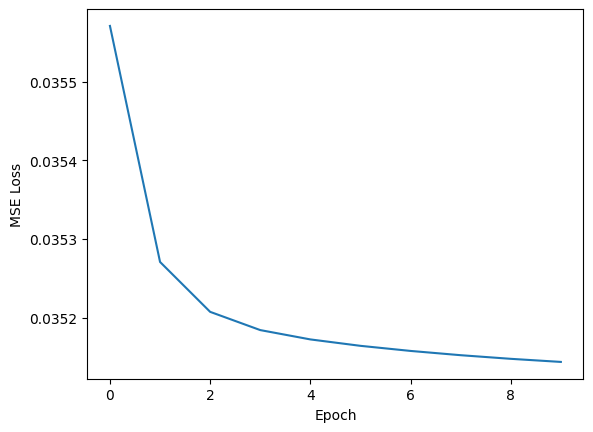

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def deriv_sigmoid(x):
    fx = sigmoid(x)
    return fx * (1 - fx)


def mse_loss(y_true, y_pred):
    return ((y_true - y_pred) ** 2).mean()


losses = []


class NeuralNetwork:
    def __init__(self):
        self.w1 = np.random.normal()
        self.w2 = np.random.normal()
        self.w3 = np.random.normal()
        self.w4 = np.random.normal()
        self.w5 = np.random.normal()
        self.w6 = np.random.normal()

        self.b1 = np.random.normal()
        self.b2 = np.random.normal()
        self.b3 = np.random.normal()

    def feedforward(self, x):
        h1 = sigmoid(self.w1 * x[0] + self.w2 * x[1] + self.b1)
        h2 = sigmoid(self.w3 * x[0] + self.w4 * x[1] + self.b2)
        o1 = sigmoid(self.w5 * h1 + self.w6 * h2 + self.b3)
        return o1

    def predict(self, x):
        return np.apply_along_axis(self.feedforward, 1, x)

    def train(self, data, all_y_trues):

        learn_rate = 0.05
        epochs = 1_000

        for epochs in range(epochs + 1):
            for x, y_true in zip(data, all_y_trues):
                sum_h1 = self.w1 * x[0] + self.w2 * x[1] + self.b1
                h1 = sigmoid(sum_h1)

                sum_h2 = self.w3 * x[0] + self.w4 * x[1] + self.b2
                h2 = sigmoid(sum_h2)

                sum_o1 = self.w5 * h1 + self.w6 * h2 + self.b3
                o1 = sigmoid(sum_o1)
                y_pred = o1

                d_L_d_ypred = -2 * (y_true - y_pred)
                # Нейрон o1
                d_ypred_d_w5 = h1 * deriv_sigmoid(sum_o1)
                d_ypred_d_w6 = h2 * deriv_sigmoid(sum_o1)
                d_ypred_d_b3 = deriv_sigmoid(sum_o1)

                d_ypred_d_h2 = self.w5 * deriv_sigmoid(sum_o1)
                d_ypred_d_h1 = self.w6 * deriv_sigmoid(sum_o1)

                # Нейрон h1
                d_h1_d_w1 = x[0] * deriv_sigmoid(sum_h1)
                d_h1_d_w2 = x[1] * deriv_sigmoid(sum_h1)
                d_h1_d_b1 = deriv_sigmoid(sum_h1)

                # Нейрон h2
                d_h2_d_w3 = x[0] * deriv_sigmoid(sum_h2)
                d_h2_d_w4 = x[1] * deriv_sigmoid(sum_h2)
                d_h2_d_b2 = deriv_sigmoid(sum_h2)

                # Обновляем вес и смещение
                # Нейрон о1
                self.w5 -= learn_rate * d_L_d_ypred * d_ypred_d_w5
                self.w6 -= learn_rate * d_L_d_ypred * d_ypred_d_w6
                self.b3 -= learn_rate * d_L_d_ypred * d_ypred_d_b3
                # Нейрон h1
                self.w1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w1
                self.w2 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w2
                self.b1 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h1_d_b1
                # Нейрон h2
                self.w3 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w3
                self.w4 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w4
                self.b2 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_b2

            if epochs % 100 == 0:
                y_pred = np.apply_along_axis(self.feedforward, 1, data)
                loss = mse_loss(all_y_trues, y_pred)
                losses.append(loss)
                print(f"Epoch {epochs} loss:{loss}")
        plt.plot(range(len(losses) - 1), losses[1:])
        plt.xlabel('Epoch')
        plt.ylabel('MSE Loss')
        plt.show()


network = NeuralNetwork()
network.train(X_pca, y)



In [4]:
# 2 параметра sklearn
# создаем и обучаем MLP
mlp = MLPClassifier()
mlp.fit(X_pca, y)

# выводим точность
print("Сеть SciPy")
print(f"Точность:{mlp.score(X_pca, y)} Ошибка: {1 - mlp.score(X_pca, y)}")

# 2 параметра сеть с лекции
print("Сеть с лекции:")
print(f"Точность: {1 - losses[-1]} Ошибка: {losses[-1]}")

# 30 ПАРАМЕТРОВ
# создаем и обучаем MLP
mlp1 = MLPClassifier()
mlp1.fit(X_std, y)

print("Сеть sklearn 30 параметров:")
print(f"Точность:{mlp1.score(X_std, y)} Ошибка: {1 - mlp1.score(X_std, y)}")

Сеть SciPy
Точность:0.9560632688927944 Ошибка: 0.04393673110720564
Сеть с лекции:
Точность: 0.9648562752121246 Ошибка: 0.03514372478787537
Сеть sklearn 30 параметров:
Точность:0.9929701230228472 Ошибка: 0.007029876977152849


C:\Users\vita2\IdeaProjects\Artificial Intelegense\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


C:\Users\vita2\AppData\Local\Temp\ipykernel_13240\3125558464.py:23: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.9, c=cmap(idx), marker=markers[idx], label=cl)


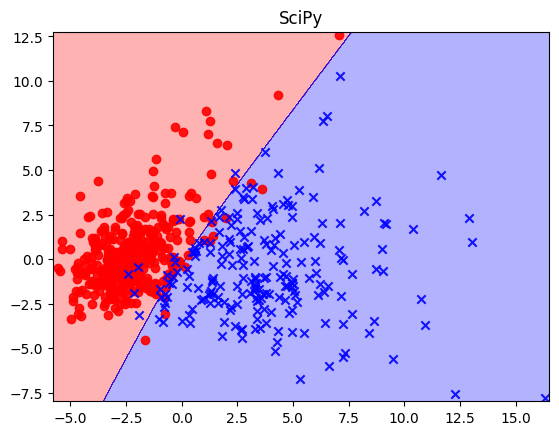

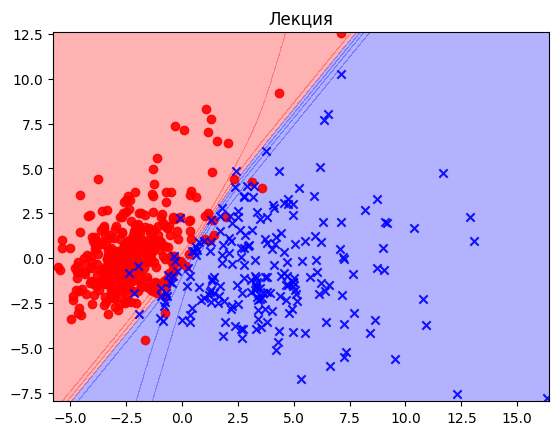

In [5]:

# SciPy plot
plt.title('SciPy')
plot_decision_regions(X_pca, y, mlp)
plt.show()
# Lecture network plot
plt.title('Лекция')
plot_decision_regions(X_pca, y, network, resolution=0.2)
plt.show()
